In [1]:
import pandas as pd
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


In [76]:

# Load the dataset
file_path = './data/Data Insights - Synthetic Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Data Insights - Synthetic Datas')



In [78]:
# Function to identify data quality issues
def identify_data_issues(df):
    print("1. Checking for missing values...")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    print("\n2. Checking for duplicate rows...")
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}")

    print("\n3. Checking for data types...")
    print(df.dtypes)

    # print("\n4. Checking for columns with unexpected or inconsistent data types...")
    # # Looking for columns that should be numeric but have object types
    # numeric_columns = df.select_dtypes(include=['object'])
    # print(f"Potential issues in numeric columns stored as objects: {numeric_columns.columns.tolist()}")

    # print("\n5. Checking for outliers in numeric columns...")
    # numeric_data = df.select_dtypes(include=['float64', 'int64'])
    # print(numeric_data.describe())

    # print("\n6. Summary of column value ranges and potential data entry issues...")
    # for col in numeric_data.columns:
    #     min_val = numeric_data[col].min()
    #     max_val = numeric_data[col].max()
    #     print(f"Column {col} - Min: {min_val}, Max: {max_val}")

    # print("\n7. Checking for invalid or extreme outliers (e.g., extremely high pharmacy charges)...")
    # extreme_outliers = df[(df['PharmacyCharge'] > 1e10) | (df['AccommodationCharge'] > 1e10)]
    # print(f"Number of extreme outliers in charges: {extreme_outliers.shape[0]}")

# Running the data quality check
identify_data_issues(df)

1. Checking for missing values...
CCU_Charges              17167
ICU_Charge               17138
TheatreCharge            17164
PharmacyCharge           16735
ProsthesisCharge         17151
OtherCharges             17181
BundledCharges           17106
UnplannedTheatreVisit    28990
InfantWeight             28475
Readmission28Days        28989
HoursMechVentilation     28531
PalliativeCareStatus     28978
dtype: int64

2. Checking for duplicate rows...
Number of duplicate rows: 0

3. Checking for data types...
insurer_id                         object
episode_id                          int64
DateOfBirth                datetime64[ns]
Postcode                            int64
Sex                                object
AdmissionDate              datetime64[ns]
SeparationDate             datetime64[ns]
AR-DRG                             object
ModeOfSeparation                   object
CareType                           object
SourceOfReferral                   object
DischargeIntention       

In [79]:
# Function to convert object columns to float
def convert_to_float(df, columns):
    for col in columns:
        try:
            # Attempt to convert the column to float
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Successfully converted {col} to float.")
        except Exception as e:
            print(f"Error converting {col}: {e}")
    return df

In [80]:
charge_columns = ['AccommodationCharge', 'CCU_Charges', 'ICU_Charge', 'TheatreCharge', 'PharmacyCharge', 'ProsthesisCharge', 'OtherCharges', 'BundledCharges']

numerical_columns = charge_columns + ['InfantWeight', 'Age', 'HoursMechVentilation']

In [6]:
df = convert_to_float(df, charge_columns)

Successfully converted AccommodationCharge to float.
Successfully converted CCU_Charges to float.
Successfully converted ICU_Charge to float.
Successfully converted TheatreCharge to float.
Successfully converted PharmacyCharge to float.
Successfully converted ProsthesisCharge to float.
Successfully converted OtherCharges to float.
Successfully converted BundledCharges to float.


In [81]:
# Fill NaN values in the charge columns with 0
df[charge_columns] = df[charge_columns].fillna(0)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   insurer_id               30000 non-null  object        
 1   episode_id               30000 non-null  int64         
 2   DateOfBirth              30000 non-null  datetime64[ns]
 3   Postcode                 30000 non-null  int64         
 4   Sex                      30000 non-null  object        
 5   AdmissionDate            30000 non-null  datetime64[ns]
 6   SeparationDate           30000 non-null  datetime64[ns]
 7   AR-DRG                   30000 non-null  object        
 8   ModeOfSeparation         30000 non-null  object        
 9   CareType                 30000 non-null  object        
 10  SourceOfReferral         30000 non-null  object        
 11  DischargeIntention       30000 non-null  object        
 12  AdmissionProviderID      30000 n

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, List, Tuple

def visualize_distributions(
    df: pd.DataFrame,
    numerical_cols: Optional[List[str]] = None,
    figsize: Tuple[int, int] = (20, 15),
    color_palette: str = "viridis",
    bins: int = 30,
    show_kde: bool = True,
    rotation: int = 60,
    save_fig: bool = False,
    fig_name: str = "variable_distributions.png"
) -> None:
    """
    Visualizes the distribution of numerical variables in a DataFrame using distribution plots.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        numerical_cols (Optional[List[str]]): List of numerical column names to visualize.
            If None, automatically detected.
        figsize (Tuple[int, int], optional): Size of the entire figure. Defaults to (20, 15).
        color_palette (str, optional): Seaborn color palette to use for plots. Defaults to "viridis".
        bins (int, optional): Number of bins for histograms. Defaults to 30.
        show_kde (bool, optional): Whether to display KDE on histograms. Defaults to True.
        rotation (int, optional): Rotation angle for x-axis labels in plots. Defaults to 60.
        save_fig (bool, optional): Whether to save the figure as a file. Defaults to False.
        fig_name (str, optional): Filename for saving the figure. Defaults to "variable_distributions.png".

    Returns:
        None: Displays the plots inline.
    """
    # Automatically detect numerical columns if not provided
    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    total_plots = len(numerical_cols)
    
    # Determine grid size based on number of plots
    if total_plots == 0:
        print("No numerical columns to plot.")
        return
    
    cols = 4  # Number of plots per row
    rows = (total_plots // cols) + int(total_plots % cols > 0)
    
    # Initialize the matplotlib figure
    plt.figure(figsize=figsize)
    sns.set(style="whitegrid")
    color = sns.color_palette(color_palette)[0]
    
    plot_idx = 1  # Counter for subplot positioning
    
    # Plot numerical variables using distribution plots
    for col in numerical_cols:
        plt.subplot(rows, cols, plot_idx)
        sns.histplot(
            data=df, 
            x=col, 
            bins=bins, 
            kde=show_kde, 
            color=color
        )
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=rotation)
        plot_idx += 1
    
    plt.tight_layout()
    
    if save_fig:
        plt.savefig(fig_name)
    plt.show()

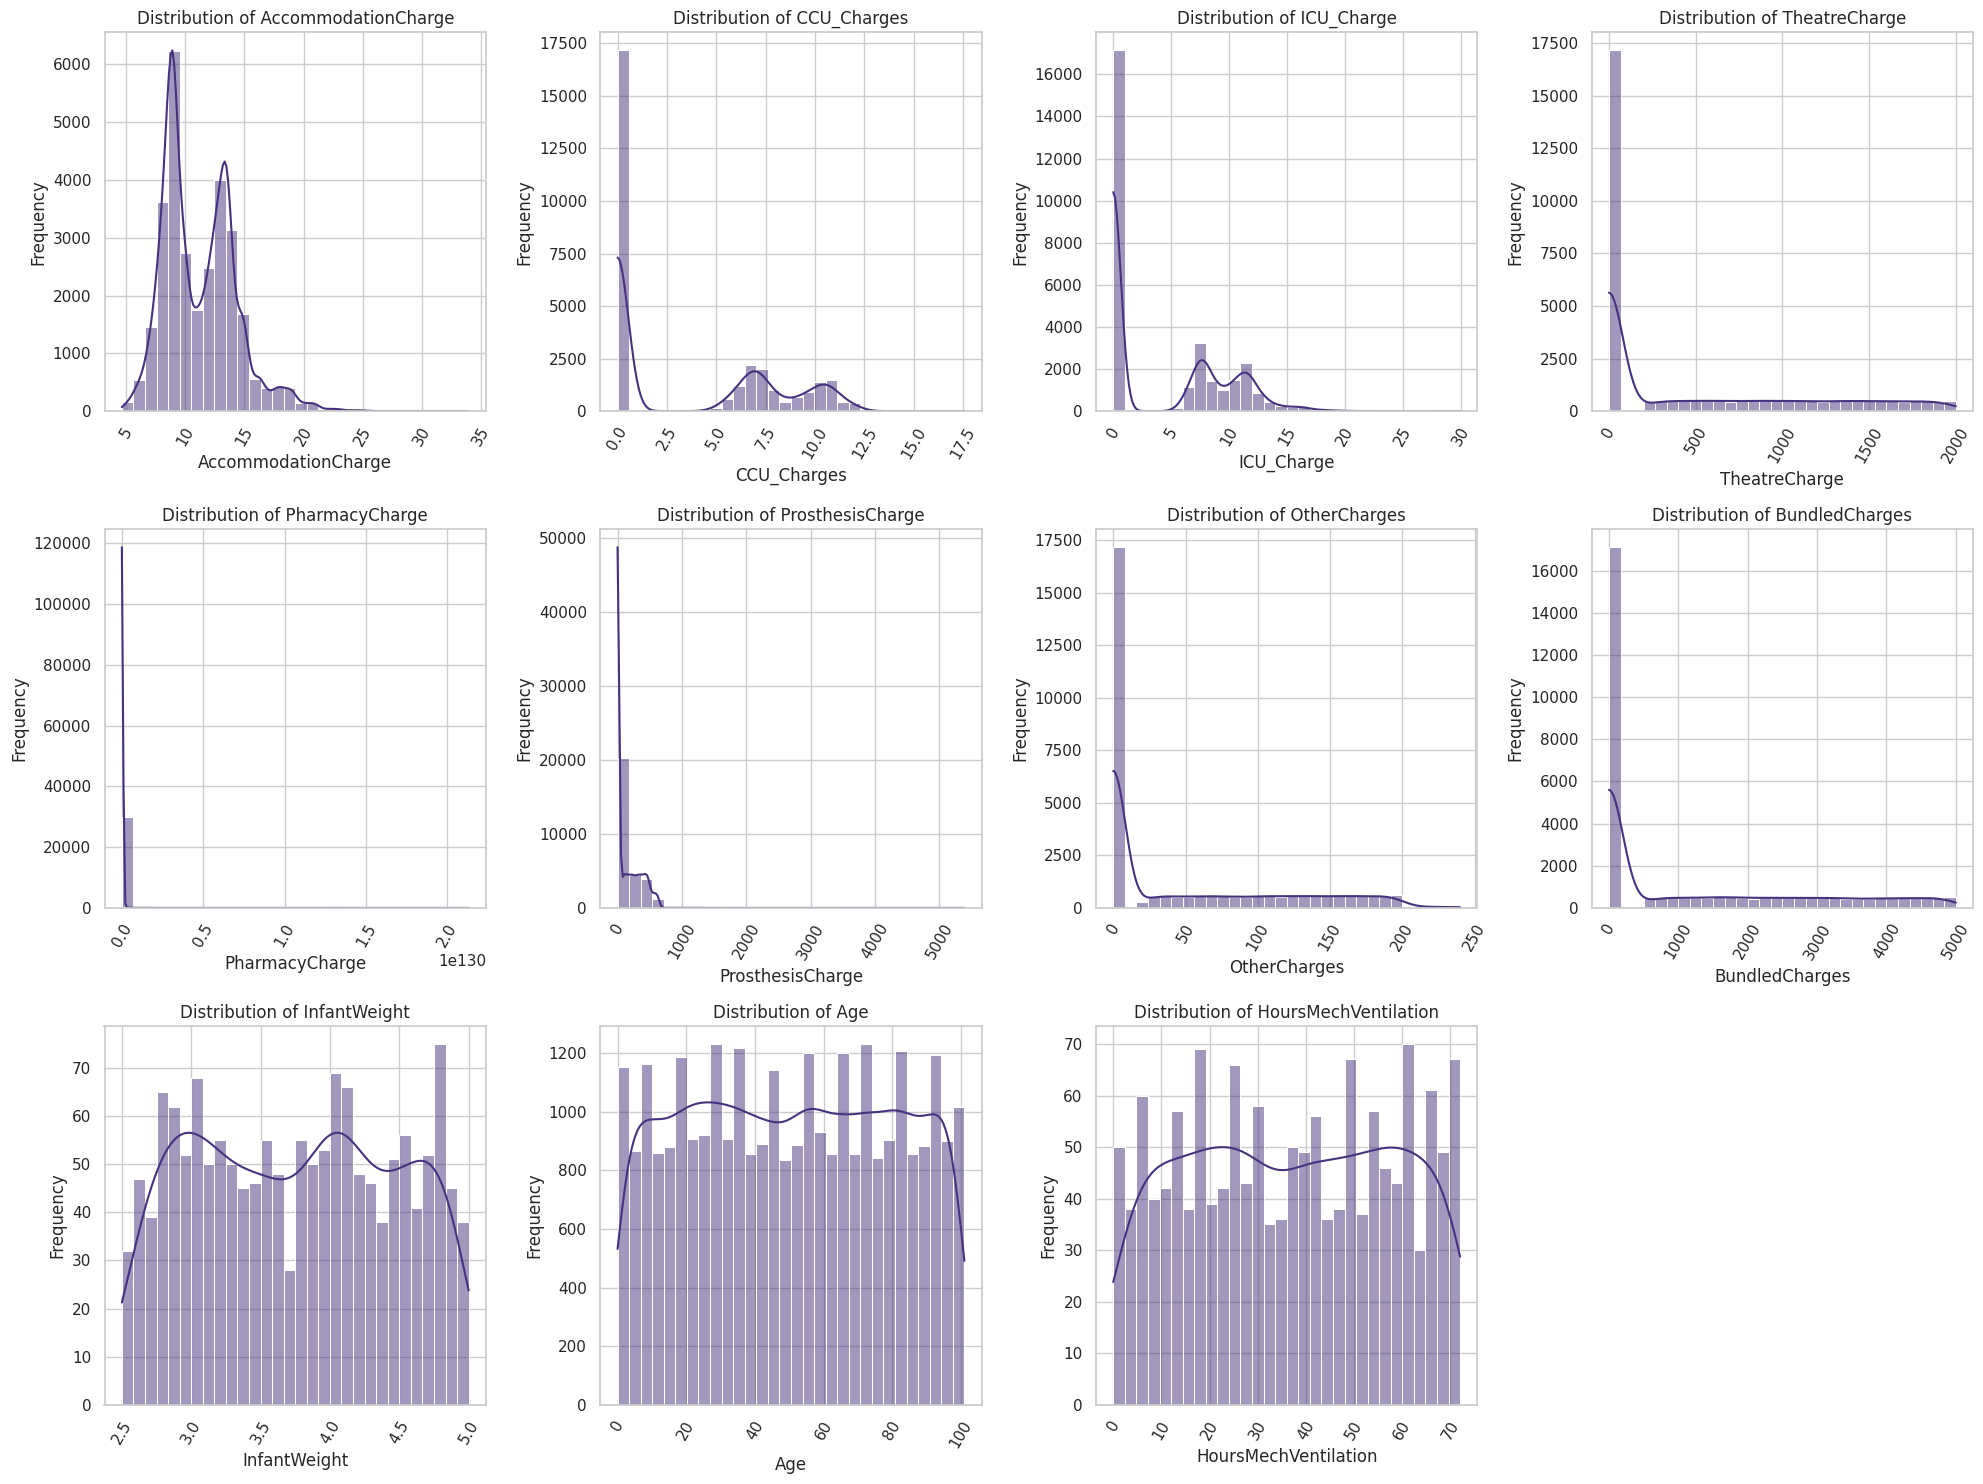

In [11]:
visualize_distributions(df, numerical_cols=numerical_columns,figsize=(20, 15))

## 2. Create Features

In [83]:
# Function to calculate the Length of Stay (LOS)
def calculate_length_of_stay(df, admission_col, separation_col):
    # Convert admission and separation dates to datetime format
    df[admission_col] = pd.to_datetime(df[admission_col], errors='coerce')
    df[separation_col] = pd.to_datetime(df[separation_col], errors='coerce')
    
    # Calculate the difference in days between SeparationDate and AdmissionDate
    df['LengthOfStay'] = (df[separation_col] - df[admission_col]).dt.days
    
    # Handle cases where LOS is negative or missing (e.g., errors in dates)
    df['LengthOfStay'] = df['LengthOfStay'].apply(lambda x: x if x >= 0 else None)
    
    return df


In [84]:
# Applying the function
df = calculate_length_of_stay(df, 'AdmissionDate', 'SeparationDate')
df[df['LengthOfStay'].isnull()]

,insurer_id,episode_id,DateOfBirth,Postcode,Sex,AdmissionDate,SeparationDate,AR-DRG,ModeOfSeparation,CareType,...,ProsthesisCharge,OtherCharges,BundledCharges,UnplannedTheatreVisit,InfantWeight,Readmission28Days,HoursMechVentilation,PalliativeCareStatus,Age,LengthOfStay


In [86]:
df.describe()

,episode_id,DateOfBirth,Postcode,AdmissionDate,SeparationDate,AdmissionProviderID,AccommodationCharge,CCU_Charges,ICU_Charge,TheatreCharge,ProsthesisCharge,OtherCharges,BundledCharges,InfantWeight,HoursMechVentilation,Age,LengthOfStay
count,30000.000000,30000,30000.000000,30000,30000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,1525.000000,1469.000000,30000.000000,30000.000000
mean,50033.716400,1973-12-23 14:30:14.400000,50024.200033,2023-08-03 05:13:29.280000256,2023-08-18 17:04:07.680000,5.346018e+06,11.189211,3.569664,4.218408,466.784102,136.192065,48.218333,1171.112147,3.751298,36.665078,50.323600,15.493500
min,0.000000,1923-08-03 00:00:00,504.000000,2022-08-01 00:00:00,2022-08-02 00:00:00,5.001550e+05,4.636378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,1.000000
25%,25133.750000,1948-08-28 12:00:00,25599.750000,2023-02-02 00:00:00,2023-02-18 00:00:00,2.797561e+06,8.804736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.110000,19.000000,25.000000,8.000000
50%,49877.000000,1973-11-18 12:00:00,49760.500000,2023-08-02 00:00:00,2023-08-17 00:00:00,5.939456e+06,10.658766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.780000,37.000000,50.000000,16.000000
75%,75086.750000,1999-03-12 00:00:00,74689.750000,2024-02-03 00:00:00,2024-02-20 00:00:00,7.568241e+06,13.324689,7.244538,8.587517,935.985000,267.039000,97.420500,2335.385000,4.360000,55.000000,76.000000,23.000000
max,99997.000000,2024-07-24 00:00:00,99947.000000,2024-07-31 00:00:00,2024-08-29 00:00:00,9.924619e+06,33.944085,17.563012,29.956644,1999.900000,5391.750000,239.964000,4999.670000,5.000000,72.000000,101.000000,30.000000
std,28877.713709,NaN,28630.887452,NaN,NaN,2.808776e+06,3.068055,4.312497,5.158868,637.339069,198.356881,66.087350,1597.777891,0.711664,21.151671,29.217789,8.649878


In [87]:
# Calculate Total Charge without PharmacyCharge
df['TotalCharges'] = df[['AccommodationCharge', 'TheatreCharge', 
                         'ProsthesisCharge', 'OtherCharges', 
                         'BundledCharges', 'CCU_Charges', 'ICU_Charge']].sum(axis=1, skipna=True)

In [109]:
# Define ICD-10 chapters with their corresponding code ranges
icd10_chapters = [
    ('A00', 'B99', 'Certain infectious and parasitic diseases'),
    ('C00', 'D48', 'Neoplasms'),
    ('D50', 'D89', 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism'),
    ('E00', 'E89', 'Endocrine, nutritional and metabolic diseases'),
    ('F00', 'F99', 'Mental and behavioural disorders'),
    ('G00', 'G99', 'Diseases of the nervous system'),
    ('H00', 'H59', 'Diseases of the eye and adnexa'),
    ('H60', 'H95', 'Diseases of the ear and mastoid process'),
    ('I00', 'I99', 'Diseases of the circulatory system'),
    ('J00', 'J99', 'Diseases of the respiratory system'),
    ('K00', 'K95', 'Diseases of the digestive system'),
    ('L00', 'L99', 'Diseases of the skin and subcutaneous tissue'),
    ('M00', 'M99', 'Diseases of the musculoskeletal system and connective tissue'),
    ('N00', 'N99', 'Diseases of the genitourinary system'),
    ('O00', 'O99', 'Pregnancy, childbirth and the puerperium'),
    ('P00', 'P96', 'Certain conditions originating in the perinatal period'),
    ('Q00', 'Q99', 'Congenital malformations, deformations and chromosomal abnormalities'),
    ('R00', 'R99', 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified'),
    ('S00', 'T98', 'Injury, poisoning and certain other consequences of external causes'),
    ('U00', 'U99', 'Codes for special purposes'),
    ('V00', 'Y99', 'External causes of morbidity and mortality'),
    ('Z00', 'Z99', 'Factors influencing health status and contact with health services')
]


In [113]:
def map_icd10_to_chapter(code: str) -> str:
    """
    Maps an ICD-10 diagnosis code to its corresponding chapter.
    """
    code = code.upper().strip()
    if len(code) < 3:
        code_prefix = code.ljust(3, '0')
    else:
        code_prefix = code[:3]
    
    for start, end, chapter in icd10_chapters:
        if start <= code_prefix <= end:
            return chapter
    return 'Unknown'

def add_icd10_chapters(df: pd.DataFrame, diagnosis_cols: list) -> pd.DataFrame:
    """
    Adds ICD-10 chapter mappings to the DataFrame for specified diagnosis columns.
    """
    for diag_col in diagnosis_cols:
        chapter_col = diag_col + '_Chapter'
        df[chapter_col] = df[diag_col].apply(map_icd10_to_chapter)
    return df

In [114]:
# Add ICD-10 Chapters
df = add_icd10_chapters(df, ['PrincipalDiagnosis'])

In [116]:
df[df['PrincipalDiagnosis_Chapter'] == 'Unknown'][['PrincipalDiagnosis', 'PrincipalDiagnosis_Chapter']]

,PrincipalDiagnosis,PrincipalDiagnosis_Chapter
6,K98.9,Unknown
53,D93.5,Unknown
153,E95.8,Unknown
168,D96.3,Unknown
178,P98.5,Unknown
...,...,...
29812,D93.9,Unknown
29885,D98.3,Unknown
29917,E94.3,Unknown
29939,P98.4,Unknown



## Data Analysis

### Admission type distribution

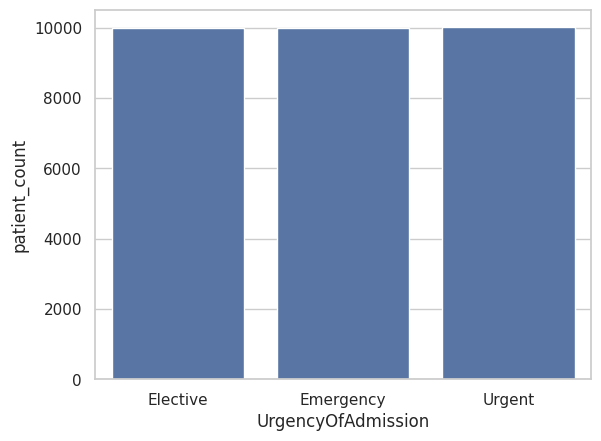

In [128]:
ds = df.groupby(['UrgencyOfAdmission'])['episode_id'].count().reset_index()
ds.columns = ['UrgencyOfAdmission', 'patient_count']
fig = sns.barplot(
    x='UrgencyOfAdmission', 
    y="patient_count", 
    data=ds
)
plt.show()

### 1.Total Charges Analysis

In [119]:
charge_columns = ['AccommodationCharge', 'CCU_Charges', 'ICU_Charge',
                  'TheatreCharge', 'ProsthesisCharge',
                  'OtherCharges', 'BundledCharges']



average_charges = df[charge_columns].mean().sort_values(ascending=False)

print("\nAverage Charges for Each Charge Type:")
print(average_charges)


Average Charges for Each Charge Type:
BundledCharges         1171.112147
TheatreCharge           466.784102
ProsthesisCharge        136.192065
OtherCharges             48.218333
AccommodationCharge      11.189211
ICU_Charge                4.218408
CCU_Charges               3.569664
dtype: float64


In [24]:


# Calculate the proportion of each charge type to TotalCharges
for col in charge_columns:
    df[col + '_Proportion'] = df[col] / df['TotalCharges']

# Average proportion of each charge type
average_proportions = df[[col + '_Proportion' for col in charge_columns]].mean().sort_values(ascending=False)

print("\nAverage Proportion of Each Charge Type to Total Charges:")
print(average_proportions)


Average Proportion of Each Charge Type to Total Charges:
BundledCharges_Proportion         0.342795
TheatreCharge_Proportion          0.253223
ProsthesisCharge_Proportion       0.155559
OtherCharges_Proportion           0.099703
AccommodationCharge_Proportion    0.093931
ICU_Charge_Proportion             0.028392
CCU_Charges_Proportion            0.026397
dtype: float64


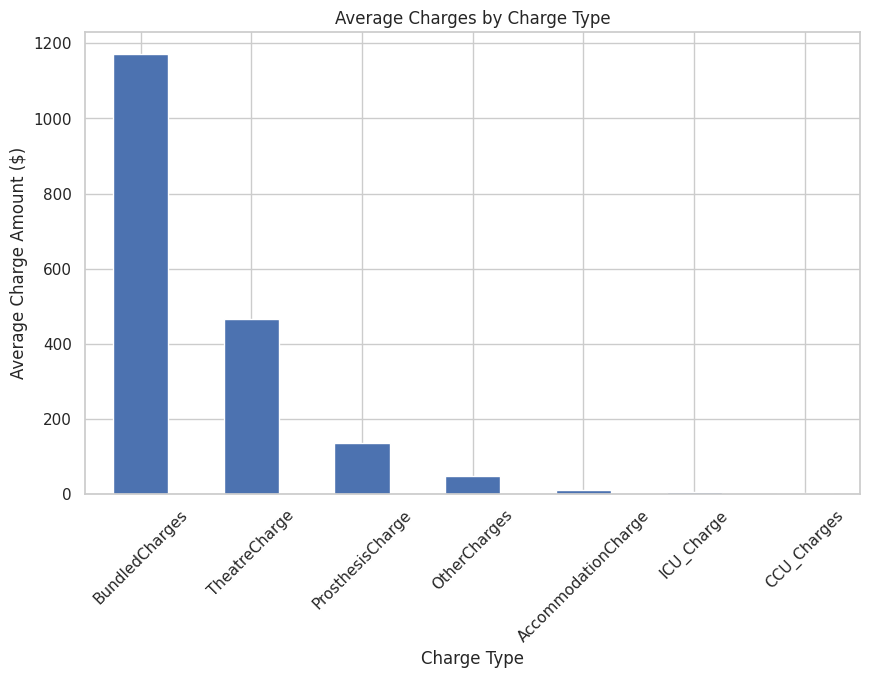

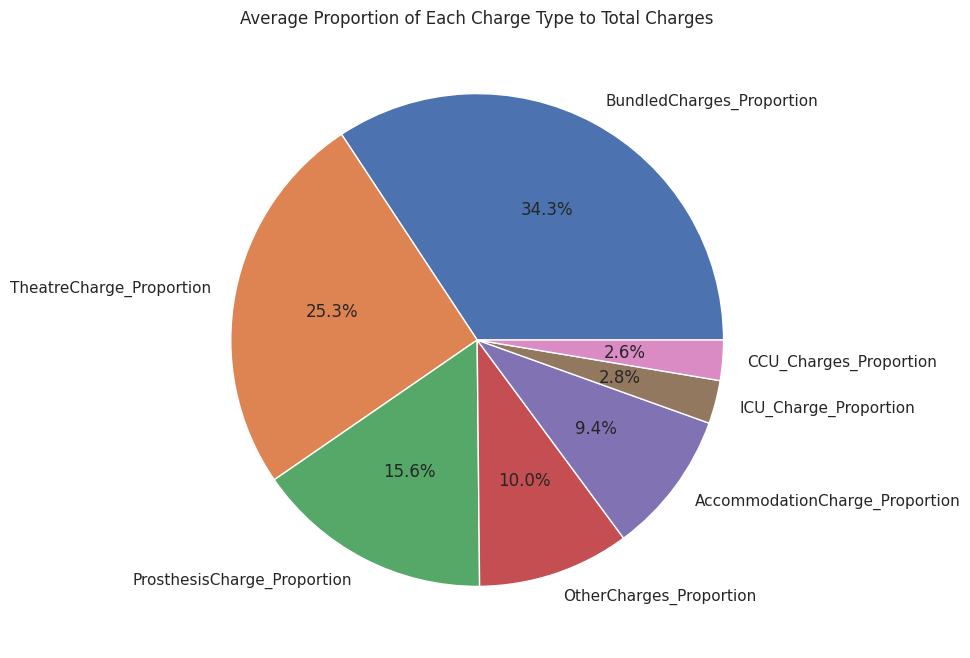

In [25]:
# Bar plot of average charge amounts
plt.figure(figsize=(10, 6))
average_charges.plot(kind='bar')
plt.title('Average Charges by Charge Type')
plt.ylabel('Average Charge Amount ($)')
plt.xlabel('Charge Type')
plt.xticks(rotation=45)
plt.show()

# Pie chart of average proportions
plt.figure(figsize=(8, 8))
average_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Proportion of Each Charge Type to Total Charges')
plt.ylabel('')
plt.show()

In [26]:
# Correlation matrix
charge_corr = df[charge_columns + ['TotalCharges']].corr()

# Extract correlations with TotalCharges
total_charge_corr = charge_corr['TotalCharges'].drop('TotalCharges').sort_values(ascending=False)

print("\nCorrelation of Each Charge Type with Total Charges:")
print(total_charge_corr)


Correlation of Each Charge Type with Total Charges:
BundledCharges         0.922913
TheatreCharge          0.387143
AccommodationCharge    0.189645
ProsthesisCharge       0.136773
OtherCharges           0.096644
ICU_Charge             0.040226
CCU_Charges            0.028029
Name: TotalCharges, dtype: float64


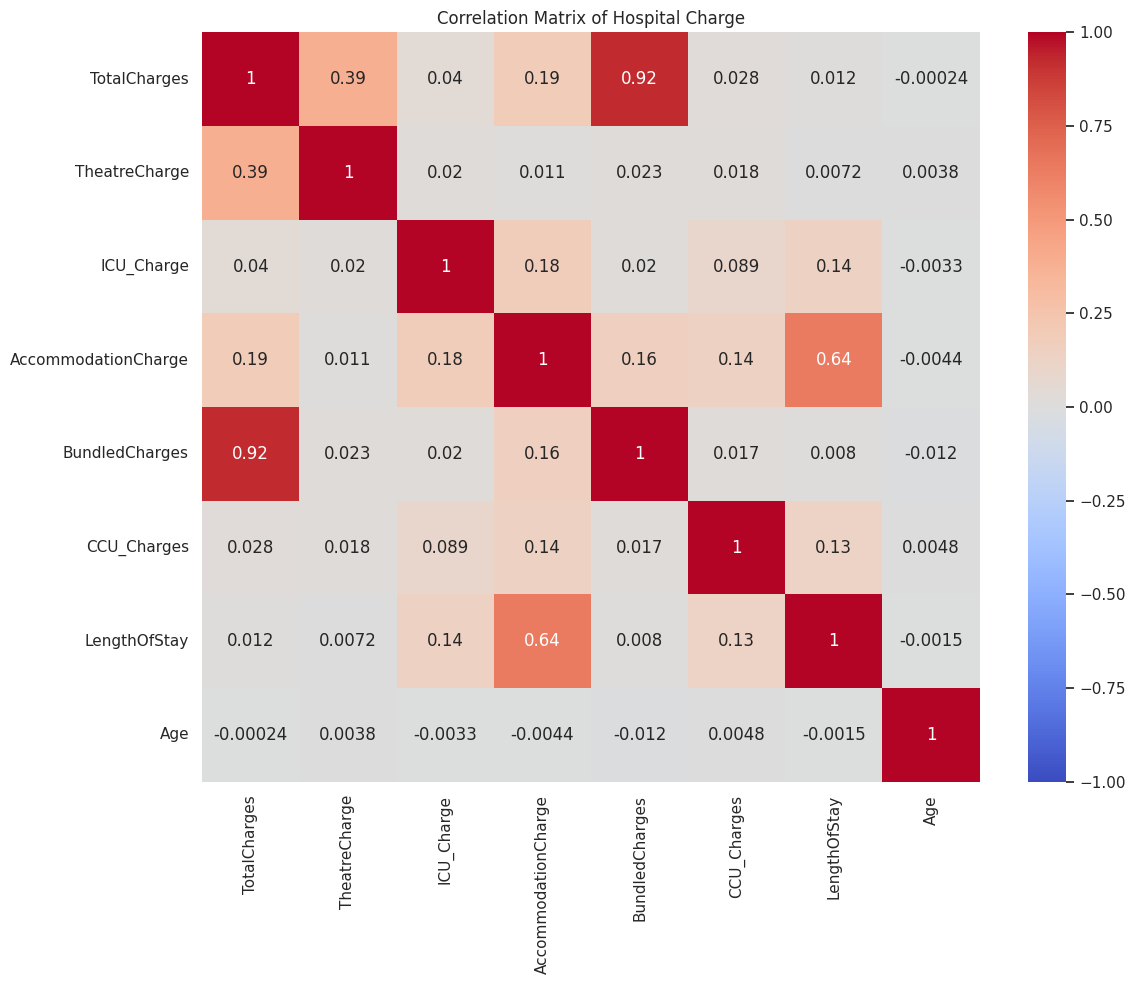

In [59]:
# Visualise correlation matrix
# Correlation matrix between total charges and other numerical columns
correlation_matrix = df[['TotalCharges', 'TheatreCharge', 'ICU_Charge', 'AccommodationCharge', 'BundledCharges', 'CCU_Charges', 'LengthOfStay', 'Age']].corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Hospital Charge')
plt.tight_layout()
plt.show()

#### 1.1 Top DRG with the Higest Average Charge

/tmp/ipykernel_4797/1607867251.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AverageCharge', y=drg_col, data=top_drg_charges, palette='Blues_d')


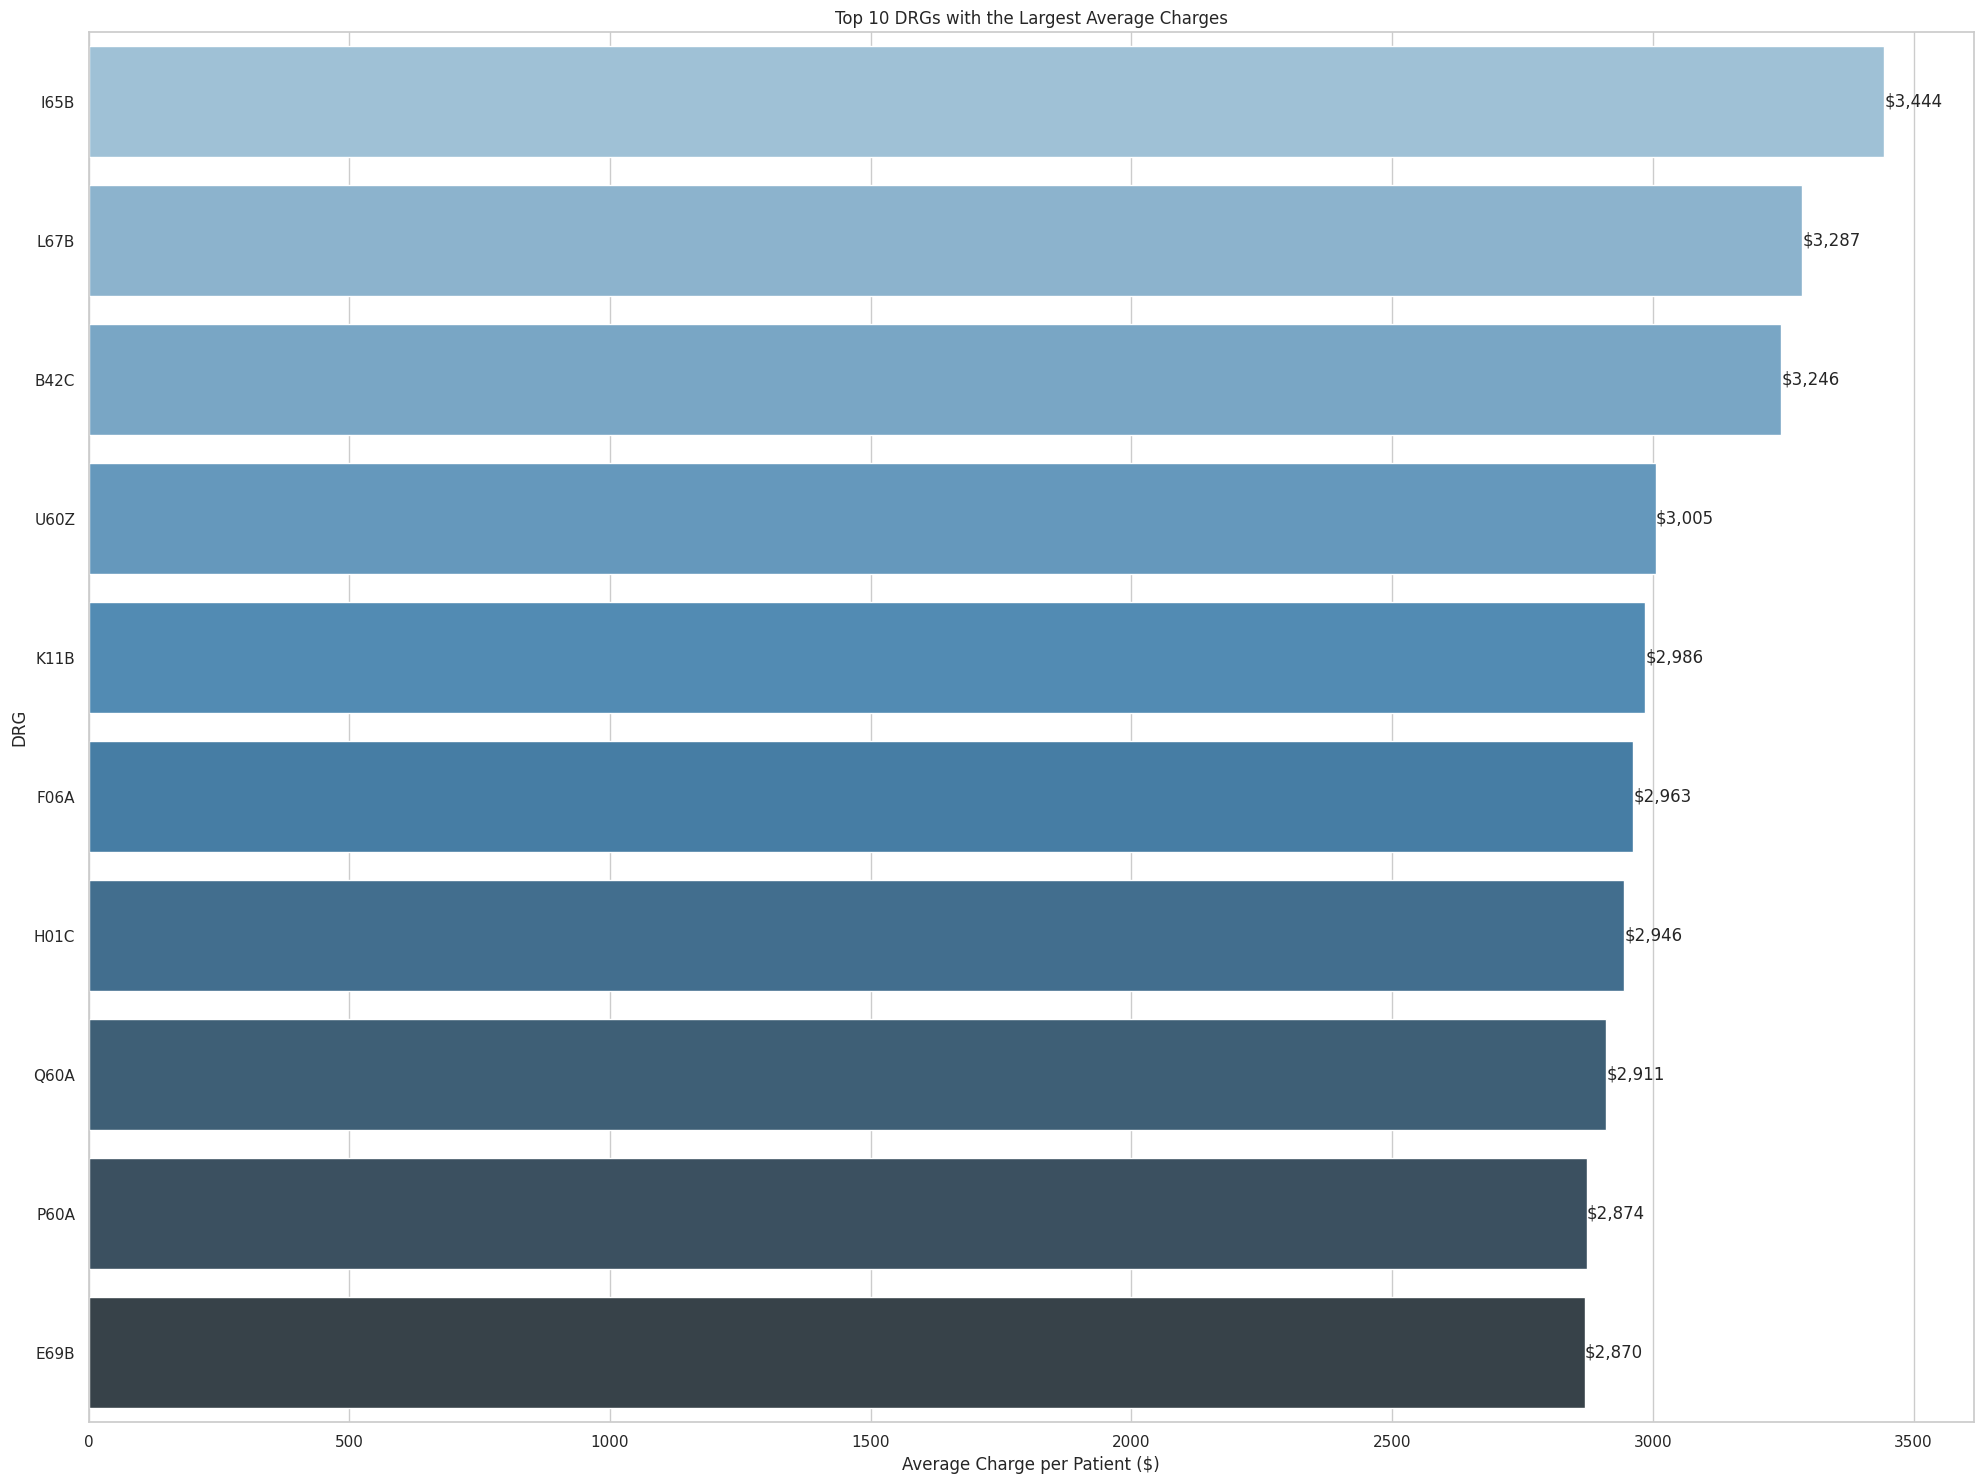

In [134]:
def visualize_drg_charges(df, drg_col, charge_col, episode_col, top_n=10):
    """
    Visualize the top DRGs based on total charges.

    Parameters:
    df (DataFrame): The input DataFrame.
    drg_col (str): The column name representing DRGs.
    charge_col (str): The column name representing the total charges.
    top_n (int): The number of top DRGs to visualize (default is 10).
    """
    # Group the data by DRG and sum the total charges
    drg_charges = df.groupby(drg_col)[charge_col].sum().reset_index()

    drg_charges['EpisodeCount'] = df.groupby(drg_col)[episode_col].count().values
    
    # Calculate average charge per episode (patient)
    drg_charges['AverageCharge'] = drg_charges[charge_col] / drg_charges['EpisodeCount']
    
    # Sort by total charges to identify the top DRGs
    top_drg_charges = drg_charges.sort_values(by='AverageCharge', ascending=False).head(top_n)
    
    # Plot the top DRGs based on total charges
    plt.figure(figsize=(20, 15))
    sns.barplot(x='AverageCharge', y=drg_col, data=top_drg_charges, palette='Blues_d')
    
    # Add labels and title
    plt.xlabel('Average Charge per Patient ($)')
    plt.ylabel('DRG')
    plt.title(f'Top {top_n} DRGs with the Largest Average Charges')
    plt.tight_layout()
    
    # Add labels at the end of each bar
    for index, value in enumerate(top_drg_charges['AverageCharge']):
        plt.text(value, index, f'${value:,.0f}', va='center')
    # Show the plot
    plt.show()

visualize_drg_charges(df, 'AR-DRG','TotalCharges' ,'episode_id' )


/tmp/ipykernel_4797/4121036700.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalCharges', y=drg_col, data=top_drg_charges, palette='Blues_d')


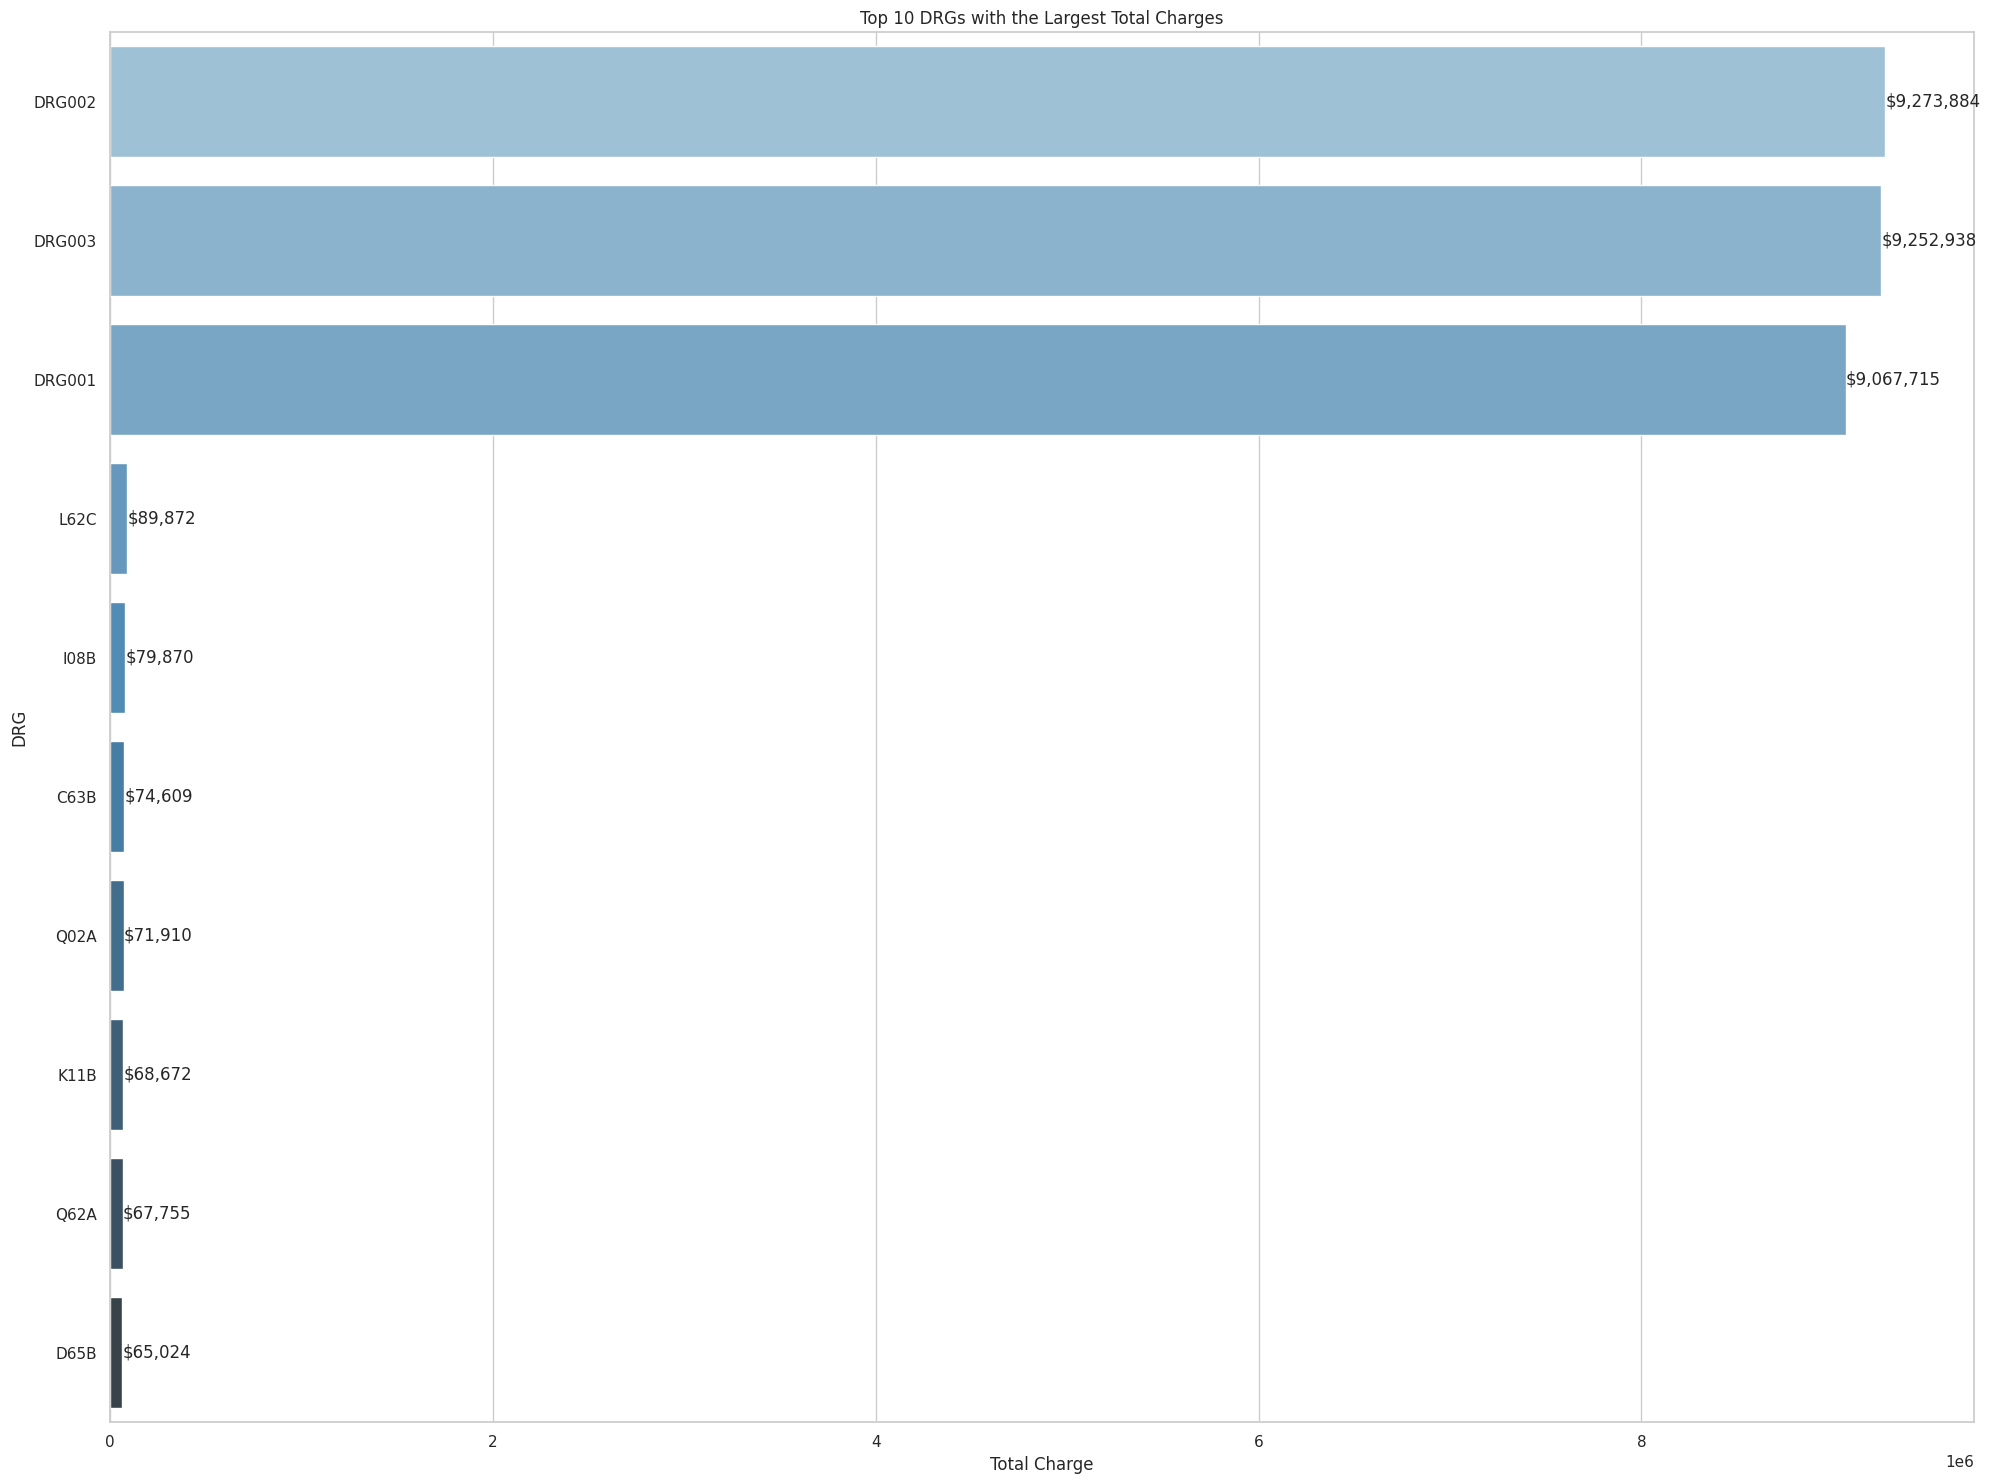

In [138]:
def visualize_drg_charges_total(df, drg_col, charge_col, episode_col, top_n=10):
    """
    Visualize the top DRGs based on total charges.

    Parameters:
    df (DataFrame): The input DataFrame.
    drg_col (str): The column name representing DRGs.
    charge_col (str): The column name representing the total charges.
    top_n (int): The number of top DRGs to visualize (default is 10).
    """
    # Group the data by DRG and sum the total charges
    drg_charges = df.groupby(drg_col)[charge_col].sum().reset_index()


    # Sort by total charges to identify the top DRGs
    top_drg_charges = drg_charges.sort_values(by='TotalCharges', ascending=False).head(top_n)
    
    # Plot the top DRGs based on total charges
    plt.figure(figsize=(20, 15))
    sns.barplot(x='TotalCharges', y=drg_col, data=top_drg_charges, palette='Blues_d')
    
    # Add labels and title
    plt.xlabel('Total Charge')
    plt.ylabel('DRG')
    plt.title(f'Top {top_n} DRGs with the Largest Total Charges')
    plt.tight_layout()
    
    # Add labels at the end of each bar
    for index, value in enumerate(top_drg_charges['TotalCharges']):
        plt.text(value, index, f'${value:,.0f}', va='center')
    # Show the plot
    plt.show()

visualize_drg_charges_total(df, 'AR-DRG','TotalCharges' ,'episode_id' )

In [31]:

# Group by PrincipalDiagnosis and calculate mean Length of Stay and Total Charges
drg_stats = df.groupby('AR-DRG').agg({
    'LengthOfStay': 'mean',
    'TotalCharges': 'mean',
    'episode_id': 'count'  # Assuming episode_id is unique per admission
}).rename(columns={'episode_id': 'PatientCount'})

# Sort by PatientCount descending
drg_stats = drg_stats.sort_values('PatientCount', ascending=False)

# Display the top 10 diagnoses
print("\nAverage Length of Stay and Total Charges by Principal Diagnosis:")
print(drg_stats.head(10))


Average Length of Stay and Total Charges by Principal Diagnosis:
        LengthOfStay  TotalCharges  PatientCount
AR-DRG                                          
DRG002     15.322568   1837.504266          5047
DRG003     15.500793   1834.444443          5044
DRG001     15.451804   1847.914136          4907
N62B       14.571429   1546.259292            35
Q62A       17.090909   2053.194937            33
L67C       15.843750   1843.682002            32
L62C       15.031250   2808.501119            32
B76A       16.375000   1728.276799            32
I08B       14.406250   2495.952260            32
Q02A       17.000000   2247.187755            32


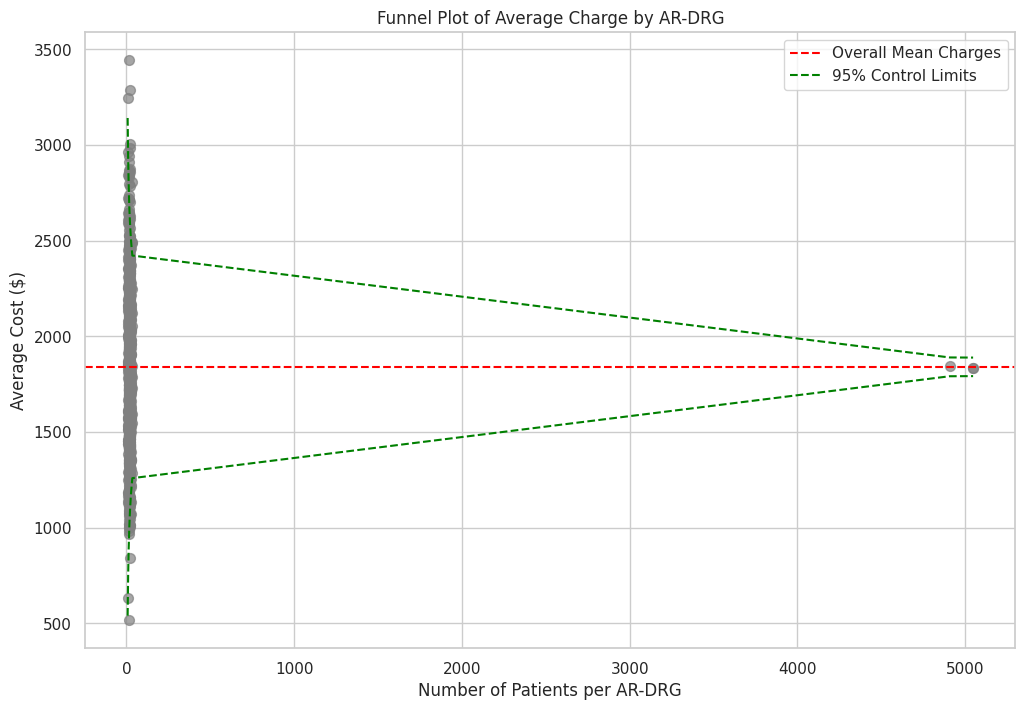

In [33]:
# Group data by AR-DRG to calculate number of patients and average length of stay
# Group data by AR-DRG to calculate number of patients and average length of stay
grouped = df.groupby('AR-DRG').agg({
    'TotalCharges': ['mean', 'count']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['AR-DRG', 'Mean_Charges', 'Patient_Count']

# Calculate the overall mean and standard deviation of Length of Stay
overall_mean = df['TotalCharges'].mean()

# Calculate the control limits based on the assumption that the standard deviation of the sample means decreases with increasing sample size
# Calculate the standard error for each group
variance = df['TotalCharges'].var(ddof=1)  # Sample variance
grouped['SE'] = np.sqrt(variance / grouped['Patient_Count'])

# Z-score for 95% confidence interval
z = 1.96

# Calculate upper and lower control limits
grouped['Upper_CI'] = overall_mean + z * grouped['SE']
grouped['Lower_CI'] = overall_mean - z * grouped['SE']

# Ensure Lower_CI is not negative
grouped['Lower_CI'] = grouped['Lower_CI'].clip(lower=0)

# Sort the data by Patient_Count for smooth plotting of control limits
grouped_sorted = grouped.sort_values('Patient_Count')

# Create the funnel plot
plt.figure(figsize=(12, 8))

# Scatter plot of Mean Length of Stay vs Patient Count
plt.scatter(grouped_sorted['Patient_Count'], grouped_sorted['Mean_Charges'], s=50, color='grey', alpha=0.7)

# Plot the overall mean line
plt.axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean Charges')

# Plot the control limits
plt.plot(grouped_sorted['Patient_Count'], grouped_sorted['Upper_CI'], color='green', linestyle='--', label='95% Control Limits')
plt.plot(grouped_sorted['Patient_Count'], grouped_sorted['Lower_CI'], color='green', linestyle='--')

# Labeling
plt.title('Funnel Plot of Average Charge by AR-DRG')
plt.xlabel('Number of Patients per AR-DRG')
plt.ylabel('Average Cost ($)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Find out top 3 DRGs with the highest number of patients
top_3_drgs = df['AR-DRG'].value_counts().nlargest(3).index.tolist()

#### 1.2 Segment the Data by Diagnoses, Procedures, Age Groups, and Urgency of Admission

In [121]:
# Group by PrincipalDiagnosis and calculate mean Length of Stay and Total Charges
diagnosis_stats = df.groupby('PrincipalDiagnosis_Chapter').agg({
    'LengthOfStay': 'mean',
    'TotalCharges': 'mean',
    'episode_id': 'count'  # Assuming episode_id is unique per admission
}).rename(columns={'episode_id': 'PatientCount'})

# Sort by PatientCount descending
diagnosis_stats = diagnosis_stats.sort_values('PatientCount', ascending=False)

# Display the top 10 diagnoses
print("\nAverage Length of Stay and Total Charges by Principal Diagnosis:")
print(diagnosis_stats.head(10))


Average Length of Stay and Total Charges by Principal Diagnosis:
                                                    LengthOfStay  \
PrincipalDiagnosis_Chapter                                         
External causes of morbidity and mortality             15.452209   
Certain infectious and parasitic diseases              15.623814   
Injury, poisoning and certain other consequence...     15.499348   
Neoplasms                                              15.452423   
Diseases of the respiratory system                     15.591371   
Diseases of the circulatory system                     15.460560   
Diseases of the genitourinary system                   15.499575   
Mental and behavioural disorders                       15.986395   
Factors influencing health status and contact w...     15.150129   
Symptoms, signs and abnormal clinical and labor...     15.563098   

                                                    TotalCharges  PatientCount  
PrincipalDiagnosis_Chapter          

In [35]:
# Melt the ProcedureCode columns to analyze all procedures
procedure_columns = ['Principal_ProcedureCode', 'ProcedureCode2', 'ProcedureCode3']
df_procedures = df.melt(id_vars=['episode_id', 'LengthOfStay', 'BundledCharges'], 
                        value_vars=procedure_columns, 
                        var_name='ProcedureNumber', 
                        value_name='ProcedureCode')

# Drop rows with missing ProcedureCode
df_procedures = df_procedures.dropna(subset=['ProcedureCode'])

# Group by ProcedureCode
procedure_stats = df_procedures.groupby('ProcedureCode').agg({
    'LengthOfStay': 'mean',
    'BundledCharges': 'mean',
    'episode_id': 'count'
}).rename(columns={'episode_id': 'ProcedureCount'})

# Sort by ProcedureCount descending
procedure_stats = procedure_stats.sort_values('ProcedureCount', ascending=False)

# Display the top 10 procedures
print("\nAverage Length of Stay and Total Charges by Procedure Code:")
print(procedure_stats.head(10))


Average Length of Stay and Total Charges by Procedure Code:
               LengthOfStay  BundledCharges  ProcedureCount
ProcedureCode                                              
66881-02          12.166667     1988.690000               6
28553-01          17.833333     1947.956667               6
91868-01          11.800000     1097.182000               5
89103-02          23.600000     1580.774000               5
20594-01          12.600000     1330.786000               5
58950-01          17.800000     2020.272000               5
96686-01          11.400000     1969.866000               5
86303-01          14.000000      962.548000               5
48331-01          19.600000      914.858000               5
23539-01           9.400000     1249.752000               5


### 2. Length of Stay Analysis

/tmp/ipykernel_4797/4242631036.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AverageLOS', y=drg_col, data=top_drg_los, palette='Blues_d')


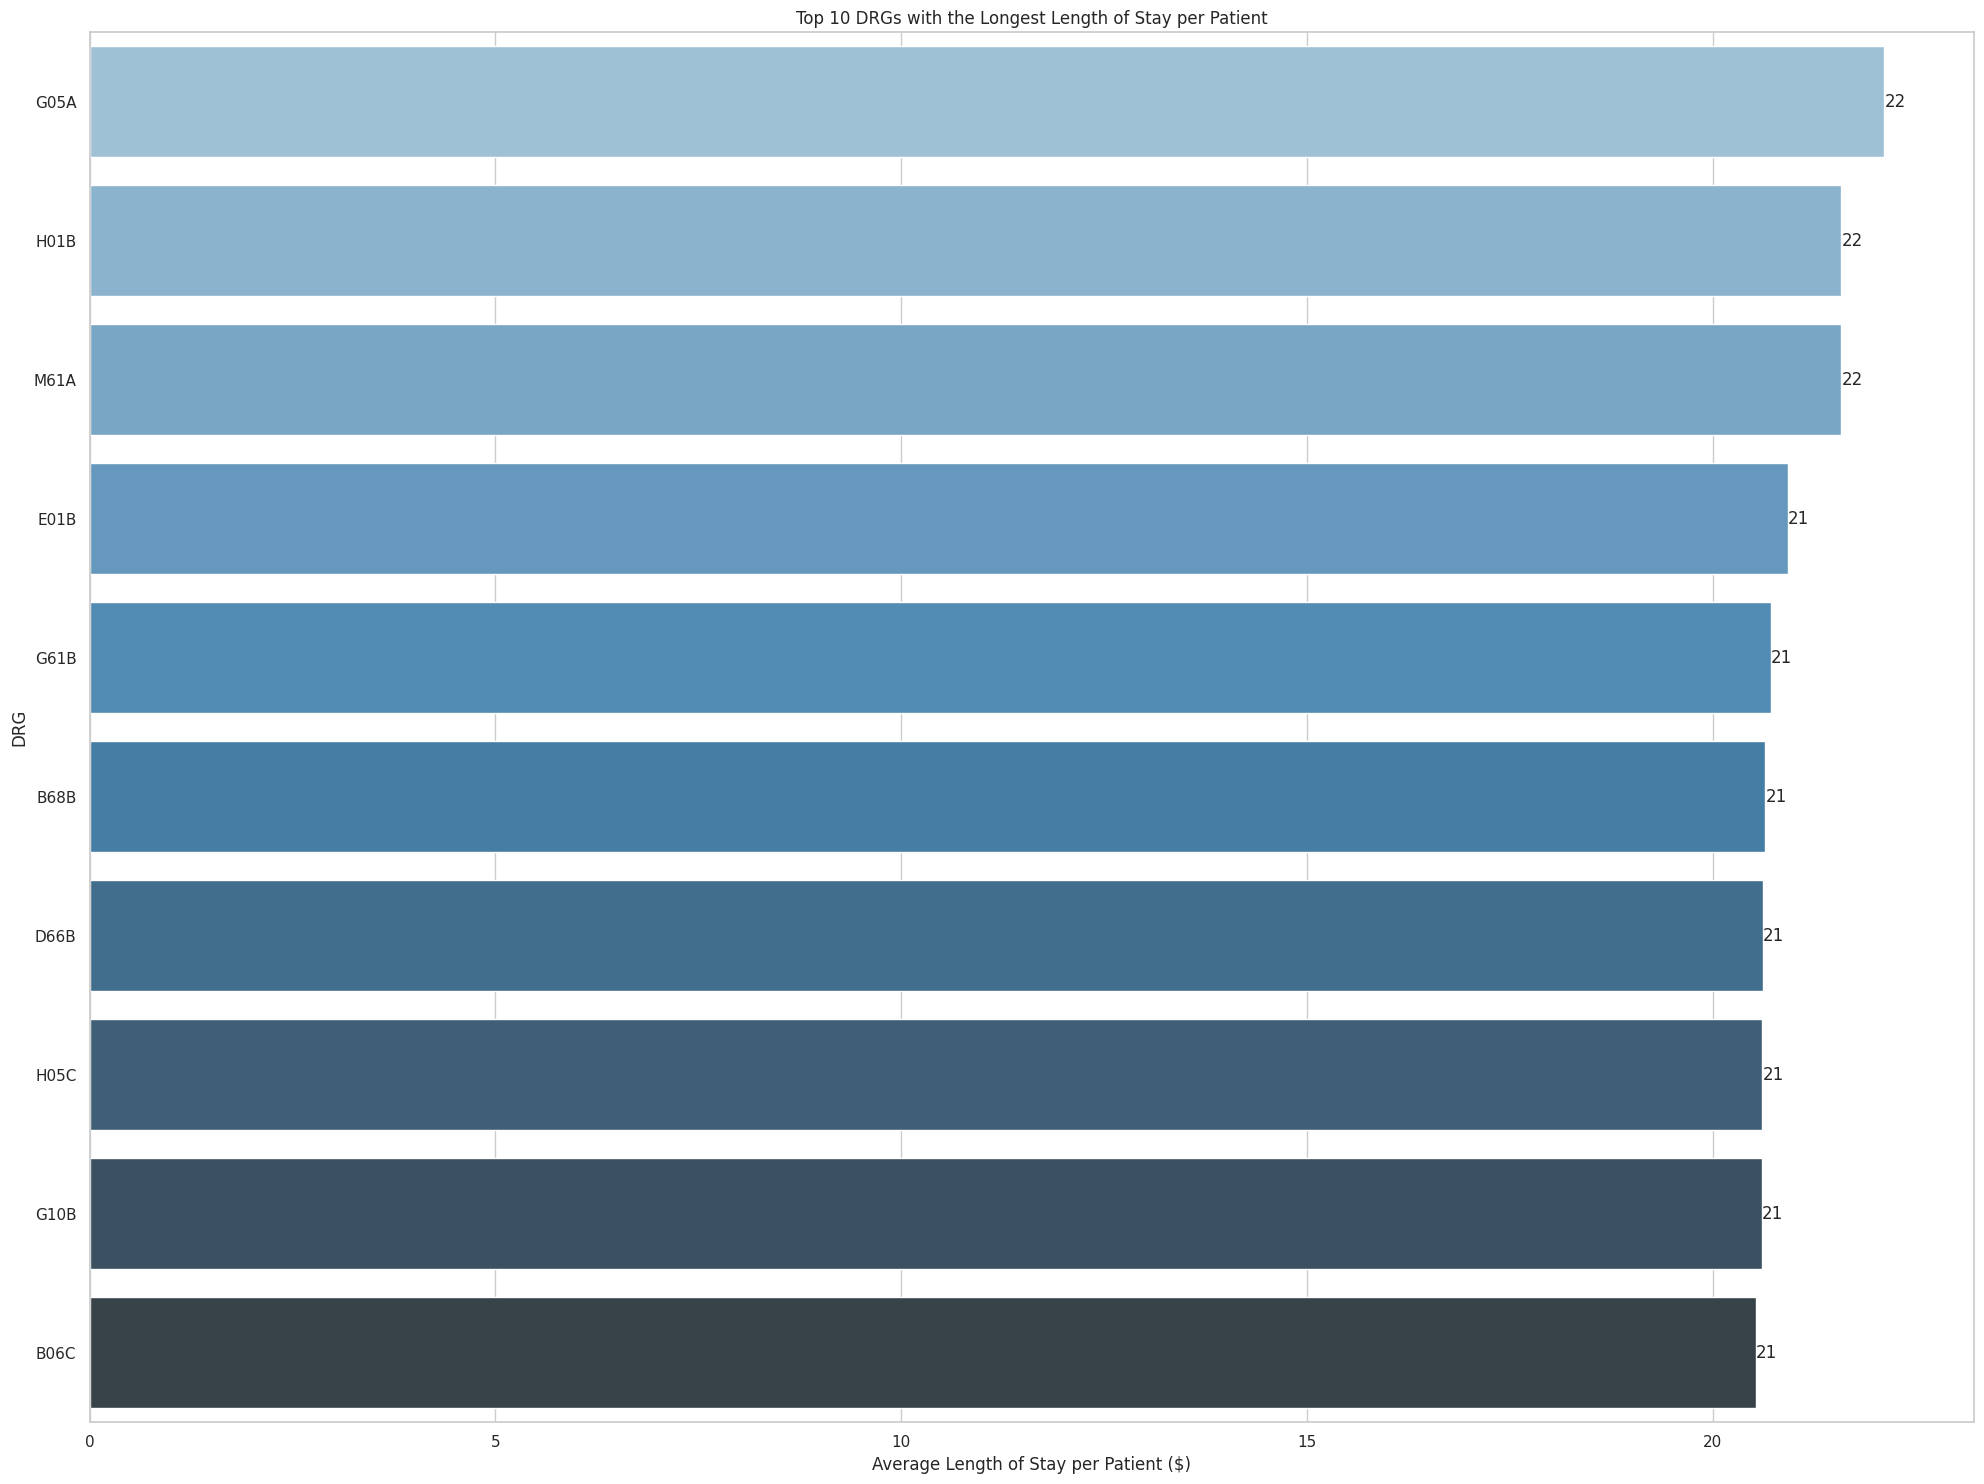

In [127]:
def visualize_length_of_stay(df, drg_col, lof_col,episode_col,top_n):
    """
    Visualize the top DRGs based on total charges.

    Parameters:
    df (DataFrame): The input DataFrame.
    drg_col (str): The column name representing DRGs.
    charge_col (str): The column name representing the total charges.
    top_n (int): The number of top DRGs to visualize (default is 10).
    """
    # Group the data by DRG and sum the total charges
    drg_los = df.groupby(drg_col)[lof_col].sum().reset_index()
    
    drg_los['EpisodeCount'] = df.groupby(drg_col)[episode_col].count().values
    
    # Calculate average charge per episode (patient)
    drg_los['AverageLOS'] = drg_los[lof_col] / drg_los['EpisodeCount']
    
    # Sort by total charges to identify the top DRGs
    top_drg_los = drg_los.sort_values(by='AverageLOS', ascending=False).head(top_n)
    
    # Plot the top DRGs based on total charges
    plt.figure(figsize=(20, 15))
    sns.barplot(x='AverageLOS', y=drg_col, data=top_drg_los, palette='Blues_d')
    
    # Add labels and title
    plt.xlabel('Average Length of Stay per Patient ($)')
    plt.ylabel('DRG')
    plt.title(f'Top {top_n} DRGs with the Longest Length of Stay per Patient')
    plt.tight_layout()
    
    # Add labels at the end of each bar
    for index, value in enumerate(top_drg_los['AverageLOS']):
        plt.text(value, index, f'{value:,.0f}', va='center')
    # Show the plot
    plt.show()

    return drg_los
drg_los = visualize_length_of_stay(df, 'AR-DRG', 'LengthOfStay', 'episode_id', 10)

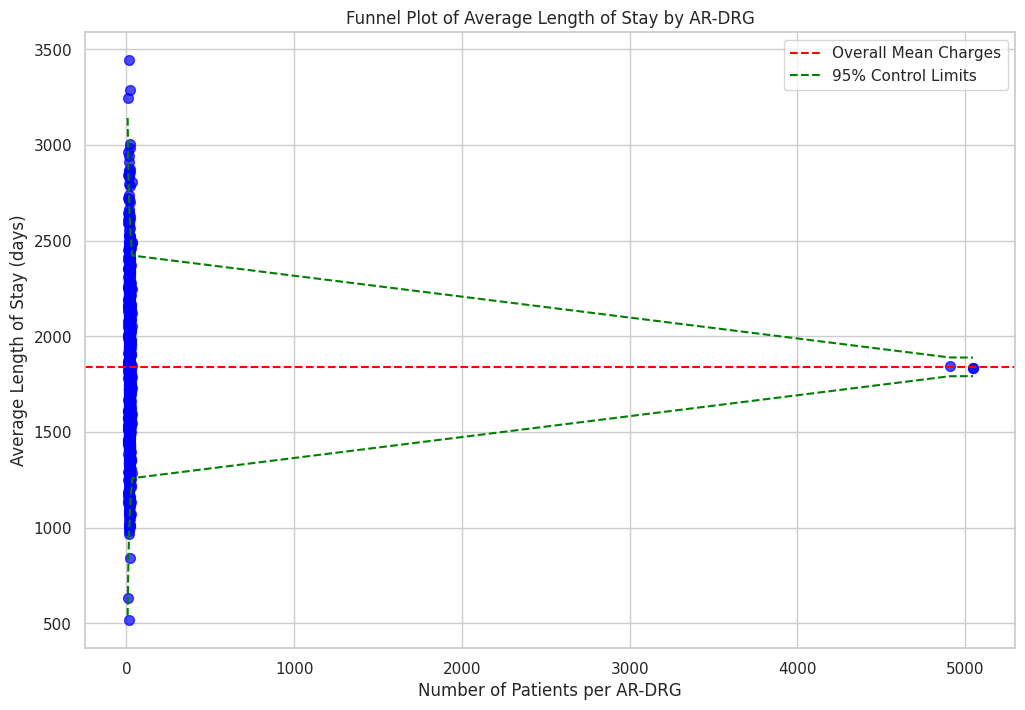

In [45]:
# Group data by AR-DRG to calculate number of patients and average length of stay
# Group data by AR-DRG to calculate number of patients and average length of stay
grouped = df.groupby('AR-DRG').agg({
    'TotalCharges': ['mean', 'count']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['AR-DRG', 'Mean_Charges', 'Patient_Count']

# Calculate the overall mean and standard deviation of Length of Stay
overall_mean = df['TotalCharges'].mean()

# Calculate the control limits based on the assumption that the standard deviation of the sample means decreases with increasing sample size
# Calculate the standard error for each group
variance = df['TotalCharges'].var(ddof=1)  # Sample variance
grouped['SE'] = np.sqrt(variance / grouped['Patient_Count'])

# Z-score for 95% confidence interval
z = 1.96

# Calculate upper and lower control limits
grouped['Upper_CI'] = overall_mean + z * grouped['SE']
grouped['Lower_CI'] = overall_mean - z * grouped['SE']

# Ensure Lower_CI is not negative
grouped['Lower_CI'] = grouped['Lower_CI'].clip(lower=0)

# Sort the data by Patient_Count for smooth plotting of control limits
grouped_sorted = grouped.sort_values('Patient_Count')

# Create the funnel plot
plt.figure(figsize=(12, 8))

# Scatter plot of Mean Length of Stay vs Patient Count
plt.scatter(grouped_sorted['Patient_Count'], grouped_sorted['Mean_Charges'], s=50, color='blue', alpha=0.7)

# Plot the overall mean line
plt.axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean Charges')

# Plot the control limits
plt.plot(grouped_sorted['Patient_Count'], grouped_sorted['Upper_CI'], color='green', linestyle='--', label='95% Control Limits')
plt.plot(grouped_sorted['Patient_Count'], grouped_sorted['Lower_CI'], color='green', linestyle='--')

# Labeling
plt.title('Funnel Plot of Average Length of Stay by AR-DRG')
plt.xlabel('Number of Patients per AR-DRG')
plt.ylabel('Average Length of Stay (days)')
plt.legend()
plt.grid(True)
plt.show()

### 3. Examine Variation Within Top DRGs

In [49]:
for drg in top_3_drgs:
    subset = df[df['AR-DRG'] == drg]
    los_mean = subset['LengthOfStay'].mean()
    los_std = subset['LengthOfStay'].std()
    print(f"DRG {drg}: Mean LOS = {los_mean:.2f}, Std Dev = {los_std:.2f}")

DRG DRG002: Mean LOS = 15.32, Std Dev = 8.63
DRG DRG003: Mean LOS = 15.50, Std Dev = 8.65
DRG DRG001: Mean LOS = 15.45, Std Dev = 8.60


In [51]:
for drg in top_3_drgs:
    subset = df[df['AR-DRG'] == drg]
    los_mean = subset['TotalCharges'].mean()
    los_std = subset['TotalCharges'].std()
    print(f"DRG {drg}: Mean LOS = {los_mean:.2f}, Std Dev = {los_std:.2f}")

DRG DRG002: Mean LOS = 1837.50, Std Dev = 1762.73
DRG DRG003: Mean LOS = 1834.44, Std Dev = 1755.26
DRG DRG001: Mean LOS = 1847.91, Std Dev = 1756.52


In [60]:
for drg in top_3_drgs:
    subset = df[df['AR-DRG'] == drg]
    los_threshold = subset['TotalCharges'].mean() + 2 * subset['TotalCharges'].std()
    print(los_threshold)
    high_los_patients = subset[subset['TotalCharges'] > los_threshold]
    print(f"DRG {drg} has {len(high_los_patients)} patients with high charge.")

5362.9585213425225
DRG DRG002 has 232 patients with high charge.
5344.972605376467
DRG DRG003 has 238 patients with high charge.
5360.952806910909
DRG DRG001 has 211 patients with high charge.


In [64]:
# For the whole dataset
cost_threshold = df['TotalCharges'].mean()
print(cost_threshold)
high_cost_patients = df[df['TotalCharges'] > los_threshold]
print(f"{len(high_cost_patients)} patients with high charge.")

1841.2839297644869
1305 patients with high charge.


In [46]:
from scipy.stats import f_oneway, kruskal
groups = [df[df['AR-DRG'] == drg]['LengthOfStay'] for drg in top_3_drgs]
anova_result = f_oneway(*groups)
print(f"ANOVA result for LOS among top DRGs: F={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")

ANOVA result for LOS among top DRGs: F=0.57, p-value=0.5631


In [48]:
from scipy.stats import f_oneway, kruskal
groups = [df[df['AR-DRG'] == drg]['TotalCharges'] for drg in top_3_drgs]
anova_result = f_oneway(*groups)
print(f"ANOVA result for total charges among top DRGs: F={anova_result.statistic:.2f}, p-value={anova_result.pvalue:.4f}")

ANOVA result for total charges among top DRGs: F=0.08, p-value=0.9232


* The average LOS and total charges for patients in the top three DRGs is statistically similar.
* Any observed differences in LOS are likely due to random variation rather than true differences between the DRGs.

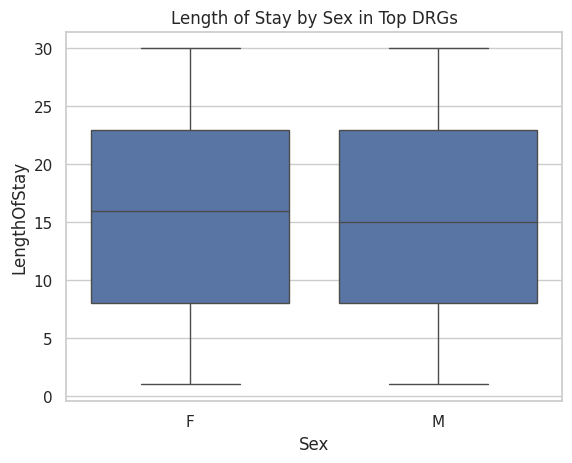

In [37]:
sns.boxplot(x='Sex', y='LengthOfStay', data=df)
plt.title('Length of Stay by Sex in Top DRGs')
plt.show()

### 4. Explore Patient Demographics, Clinical Information and Their Impact

#### 4.1 Age Group

In [140]:
# Define age bins and labels
import numpy as np
age_bins = [0, 18, 35, 50, 65, 80, np.inf]
age_labels = ['0-17', '18-34', '35-49', '50-64', '65-79', '80+']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by AgeGroup
age_group_stats = df.groupby('AgeGroup').agg({
    'LengthOfStay': 'mean',
    'TotalCharges': 'sum',
    'episode_id': 'count'
}).rename(columns={'episode_id': 'PatientCount'})

print("\nAverage Length of Stay and Total Charges by Age Group:")
print(age_group_stats)


Average Length of Stay and Total Charges by Age Group:
          LengthOfStay  TotalCharges  PatientCount
AgeGroup                                          
0-17         15.519406  9.696221e+06          5256
18-34        15.499041  9.581558e+06          5212
35-49        15.552431  7.915514e+06          4339
50-64        15.480696  8.195574e+06          4481
65-79        15.463118  8.196012e+06          4433
80+          15.446809  1.122352e+07          6063


/tmp/ipykernel_4797/1625499418.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('AgeGroup').agg({


/tmp/ipykernel_4797/1151575678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='LengthOfStay', data=age_group_stats, ax=axes[0], palette='Blues_d')
/tmp/ipykernel_4797/1151575678.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='TotalCharges', data=age_group_stats, ax=axes[1], palette='Greens_d')
/tmp/ipykernel_4797/1151575678.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='PatientCount', data=age_group_stats, ax=axes[2], palette='Reds_d')
/tmp/ipykernel_4797/1151575678.py:36: Us

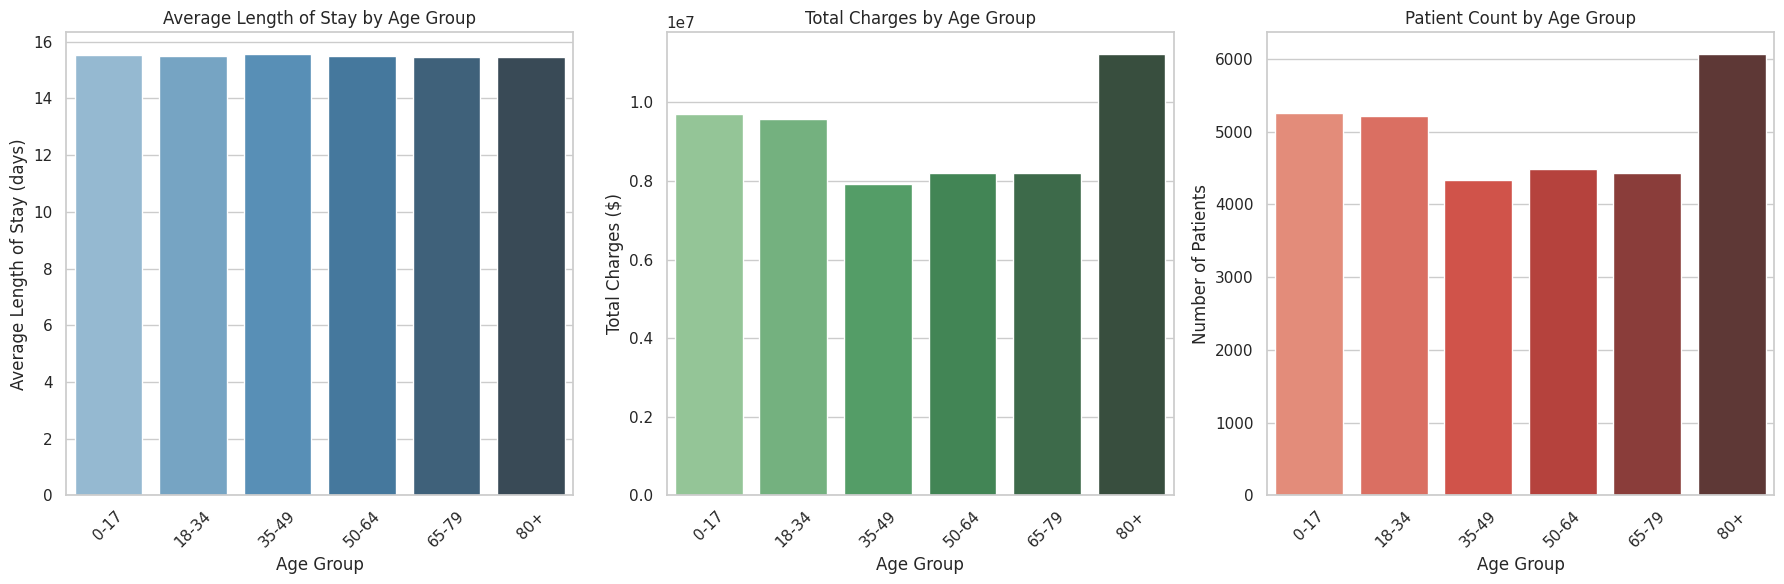

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already executed the previous code to create 'age_group_stats'

# Reset the index to turn 'AgeGroup' into a column (if not already)
age_group_stats = age_group_stats.reset_index()

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Average Length of Stay by Age Group
sns.barplot(x='AgeGroup', y='LengthOfStay', data=age_group_stats, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Length of Stay by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Average Length of Stay (days)')

# Bar plot for Average Total Charges by Age Group
sns.barplot(x='AgeGroup', y='TotalCharges', data=age_group_stats, ax=axes[1], palette='Greens_d')
axes[1].set_title('Total Charges by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Total Charges ($)')

# Bar plot for Patient Count by Age Group
sns.barplot(x='AgeGroup', y='PatientCount', data=age_group_stats, ax=axes[2], palette='Reds_d')
axes[2].set_title('Patient Count by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Number of Patients')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### 4.3 Sex


Average Length of Stay and Total Charges by Age Group:
     LengthOfStay  TotalCharges  PatientCount
Sex                                          
F       15.562192   1842.686403         15002
M       15.424790   1839.881082         14998


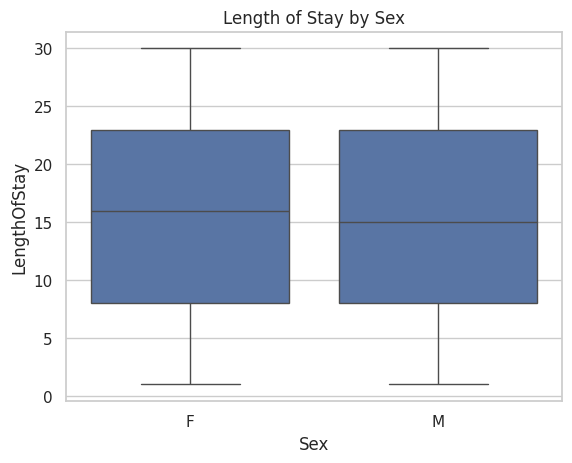

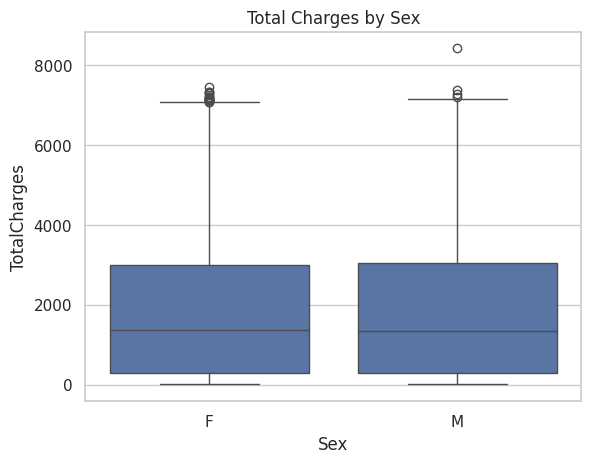

In [94]:
# Define age bins and labels

age_group_stats = df.groupby('Sex').agg({
    'LengthOfStay': 'mean',
    'TotalCharges': 'mean',
    'episode_id': 'count'
}).rename(columns={'episode_id': 'PatientCount'})

print("\nAverage Length of Stay and Total Charges by Age Group:")
print(age_group_stats)

sns.boxplot(x='Sex', y='LengthOfStay', data=df)
plt.title('Length of Stay by Sex')
plt.show()


sns.boxplot(x='Sex', y='TotalCharges', data=df)
plt.title('Total Charges by Sex')
plt.show()

#### 4.4 Distribution by UrgencyOfAdmission


Average Length of Stay and Total Charges by Urgency of Admission:
                    LengthOfStay  TotalCharges  AdmissionCount
UrgencyOfAdmission                                            
Elective               15.436686   1832.505643            9982
Emergency              15.599460   1843.884740           10004
Urgent                 15.444278   1847.435952           10014


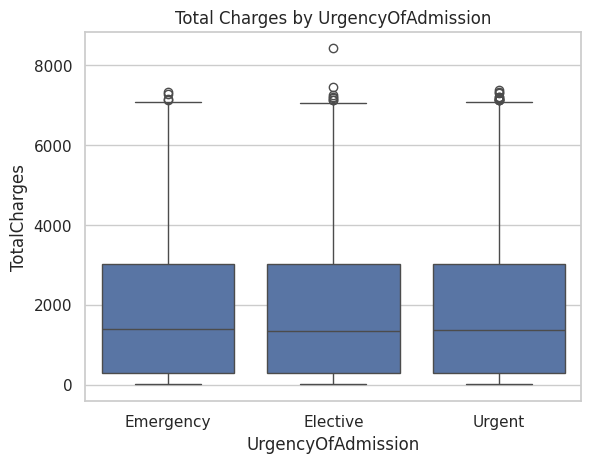

In [123]:
# Group by UrgencyOfAdmission
urgency_stats = df.groupby('UrgencyOfAdmission').agg({
    'LengthOfStay': 'mean',
    'TotalCharges': 'mean',
    'episode_id': 'count'
}).rename(columns={'episode_id': 'AdmissionCount'})

print("\nAverage Length of Stay and Total Charges by Urgency of Admission:")
print(urgency_stats)

sns.boxplot(x='UrgencyOfAdmission', y='TotalCharges', data=df)
plt.title('Total Charges by UrgencyOfAdmission')
plt.show()


#### 4.5 Total Costs by CareType


Average Length of Stay and Total Charges by Urgency of Admission:
            LengthOfStay  TotalCharges  AdmissionCount
CareType                                              
Emergency      15.400474   1849.581653           10133
Inpatient      15.520859   1841.380750            9924
Outpatient     15.560998   1832.731010            9943


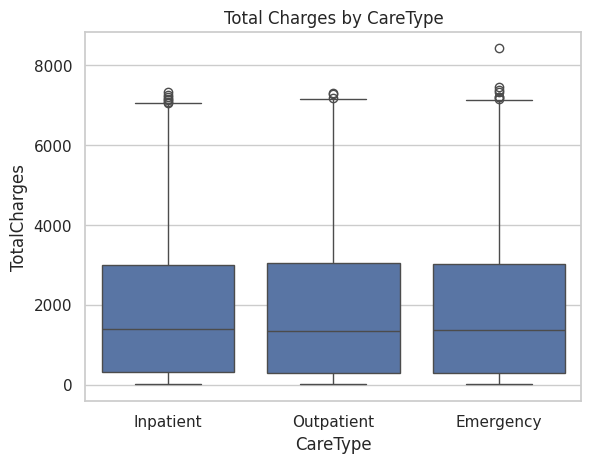

In [124]:
# Group by CareType
urgency_stats = df.groupby('CareType').agg({
    'LengthOfStay': 'mean',
    'TotalCharges': 'mean',
    'episode_id': 'count'
}).rename(columns={'episode_id': 'AdmissionCount'})

print("\nAverage Length of Stay and Total Charges by Urgency of Admission:")
print(urgency_stats)

sns.boxplot(x='CareType', y='TotalCharges', data=df)
plt.title('Total Charges by CareType')
plt.show()


In [58]:
from scipy.stats import f_oneway

# Groups based on 'UrgencyOfAdmission'
groups = df.groupby('CareType')['TotalCharges'].apply(list)

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f'ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}')

ANOVA F-statistic: 0.23, p-value: 0.7936


In [ ]:
from scipy.stats import f_oneway

# Groups based on 'UrgencyOfAdmission'
groups = df.groupby('UrgencyOfAdmission')['TotalCharges'].apply(list)

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f'ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}')

In [41]:
# Example for Principal Diagnosis
diagnosis_groups = df.groupby('AR-DRG')
for name, group in diagnosis_groups:
    if len(group) > 30:  # Only consider groups with sufficient data
        corr, _ = pearsonr(group['LengthOfStay'], group['TotalCharges'])
        print(f"Diagnosis: {name}, Pearson correlation: {corr:.4f}")

Diagnosis: B76A, Pearson correlation: 0.0236
Diagnosis: DRG001, Pearson correlation: 0.0296
Diagnosis: DRG002, Pearson correlation: -0.0119
Diagnosis: DRG003, Pearson correlation: 0.0091
Diagnosis: I08B, Pearson correlation: -0.1133
Diagnosis: L62C, Pearson correlation: -0.0931
Diagnosis: L67C, Pearson correlation: -0.2389
Diagnosis: N62B, Pearson correlation: 0.0291
Diagnosis: Q02A, Pearson correlation: -0.1575
Diagnosis: Q62A, Pearson correlation: 0.1348
Diagnosis: Y02C, Pearson correlation: -0.2012


#### 4.6 Total Charges by Principal Diagnosis

In [151]:
# Group by AgeGroup
diagnosis_stats = df.groupby('PrincipalDiagnosis_Chapter').agg({
    'LengthOfStay': 'mean',
    'TotalCharges': 'mean',
    'episode_id': 'count'
}).rename(columns={'episode_id': 'PatientCount'})

print("\nAverage Length of Stay and Total Charges by Age Group:")
print(diagnosis_stats.sort_values(by='PatientCount', ascending=False).head(10))


Average Length of Stay and Total Charges by Age Group:
                                                    LengthOfStay  \
PrincipalDiagnosis_Chapter                                         
External causes of morbidity and mortality             15.452209   
Certain infectious and parasitic diseases              15.623814   
Injury, poisoning and certain other consequence...     15.499348   
Neoplasms                                              15.452423   
Diseases of the respiratory system                     15.591371   
Diseases of the circulatory system                     15.460560   
Diseases of the genitourinary system                   15.499575   
Mental and behavioural disorders                       15.986395   
Factors influencing health status and contact w...     15.150129   
Symptoms, signs and abnormal clinical and labor...     15.563098   

                                                    TotalCharges  PatientCount  
PrincipalDiagnosis_Chapter                    

## 5. High Cost Patients

In [125]:
# 3. Calculate the 95th percentile of TotalCharges
threshold = df['TotalCharges'].quantile(0.95)

print(f"The threshold for high-cost patients (top 5%) is: ${threshold:.2f}")

# 4. Identify high-cost patients
high_cost_patients = df[df['TotalCharges'] > threshold]

# 5. Output the number of high-cost patients
print(f"Number of high-cost patients: {len(high_cost_patients)}")

# 6. Analyze high-cost patients
# For example, display the top 10 high-cost patients
top_high_cost_patients = high_cost_patients.sort_values(by='TotalCharges', ascending=False).head(10)

# Display selected columns for these patients
print("Top 10 high-cost patients:")


The threshold for high-cost patients (top 5%) is: $5249.81
Number of high-cost patients: 1500
Top 10 high-cost patients:


In [126]:
top_high_cost_patients[['episode_id', 'TotalCharges', 'Age', 'Sex', 'LengthOfStay', 'AR-DRG', 'PrincipalDiagnosis', 'Principal_ProcedureCode', 'PrincipalDiagnosis_Chapter']]

,episode_id,TotalCharges,Age,Sex,LengthOfStay,AR-DRG,PrincipalDiagnosis,Principal_ProcedureCode,PrincipalDiagnosis_Chapter
11311,12526,8415.459749,63,M,29,DRG003,H72.7,13068-02,Diseases of the ear and mastoid process
10189,62974,7461.094400,58,F,2,D11Z,K22.1,12600-01,Diseases of the digestive system
5866,56415,7369.721824,92,M,28,DRG002,Q24.8,78813-01,"Congenital malformations, deformations and chr..."
3817,76765,7332.079678,96,F,18,K60A,P43.7,51604-01,Certain conditions originating in the perinata...
28962,81547,7318.257483,23,F,28,H65A,N55.4,15708-01,Diseases of the genitourinary system
7903,89298,7307.760898,8,F,7,A15C,V47.7,92756-02,External causes of morbidity and mortality
15468,28501,7272.092324,86,M,8,DRG003,H14.5,12688-02,Diseases of the eye and adnexa
23154,53018,7255.807743,78,F,25,O03Z,Q25.1,14745-02,"Congenital malformations, deformations and chr..."
3581,86951,7211.791047,76,M,13,DRG002,M97.0,39944-01,Diseases of the musculoskeletal system and con...
8081,45219,7209.932091,92,F,29,L02A,B33.4,67552-02,Certain infectious and parasitic diseases


## Key Analyses and Insights:
### 1. Bundled Charges as a Major Cost Driver:
* High Correlation with Total Charges:
    * Bundled Charges are highly correlated with Total Charges, indicating they are significant contributors to overall costs.
* Strategic Implications:
    * Focusing on managing Bundled Charges can help in cost reduction and resource optimization.

### 2. Concentration in Specific DRGs:
* 50% of Patients in Three DRGs:
    * A large proportion of patients are concentrated in just three Diagnosis-Related Groups.
* Implications:
    * Targeting these DRGs for efficiency improvements can have a substantial impact on operations and costs.

### 3. Length of Stay (LOS) Analysis:
*  LOS Correlated with Accommodation Charges but Weakly with Total Charges:
    *   While longer LOS increases Accommodation Charges, it doesn't significantly affect Total Charges.
* ANOVA Test on LOS Among Top DRGs:
    * No significant difference in LOS among the top three DRGs, suggesting uniformity in patient stay durations across these groups.

### 4. Charge by Care Type:
* The median total charge is similar across different types of care (Inpatient, Outpatient, and Emergency), there are more outliers with higher charges in Emergency care. 
